# Decision Tree

# Company_Data

In [104]:
# import all required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [105]:
#reading the dataset
company=pd.read_csv("/Users/Admin/Documents/data science assignment/Desicion Tree/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Data Processing

In [106]:
#viewing the types
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [107]:
#converting from categorical data
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')

In [108]:
company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
High              int64
dtype: object

In [109]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [110]:
#label encoding to convert categorical values into numeric.
company['ShelveLoc']=company['ShelveLoc'].cat.codes
company['Urban']=company['Urban'].cat.codes
company['US']=company['US'].cat.codes
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


In [111]:
# setting feature and target variables 
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']

In [112]:
# splitting the data
x = company[feature_cols]
y = company.High

In [113]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [114]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [115]:
# splitting into train and test data 
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

# Building decision tree model using Entropy

In [152]:
# Decision using entropy
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=6)

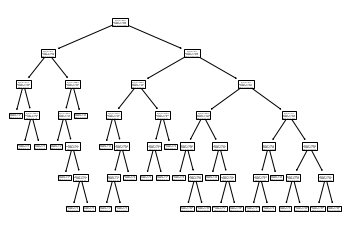

In [153]:
#PLot the decision tree
tree.plot_tree(model);

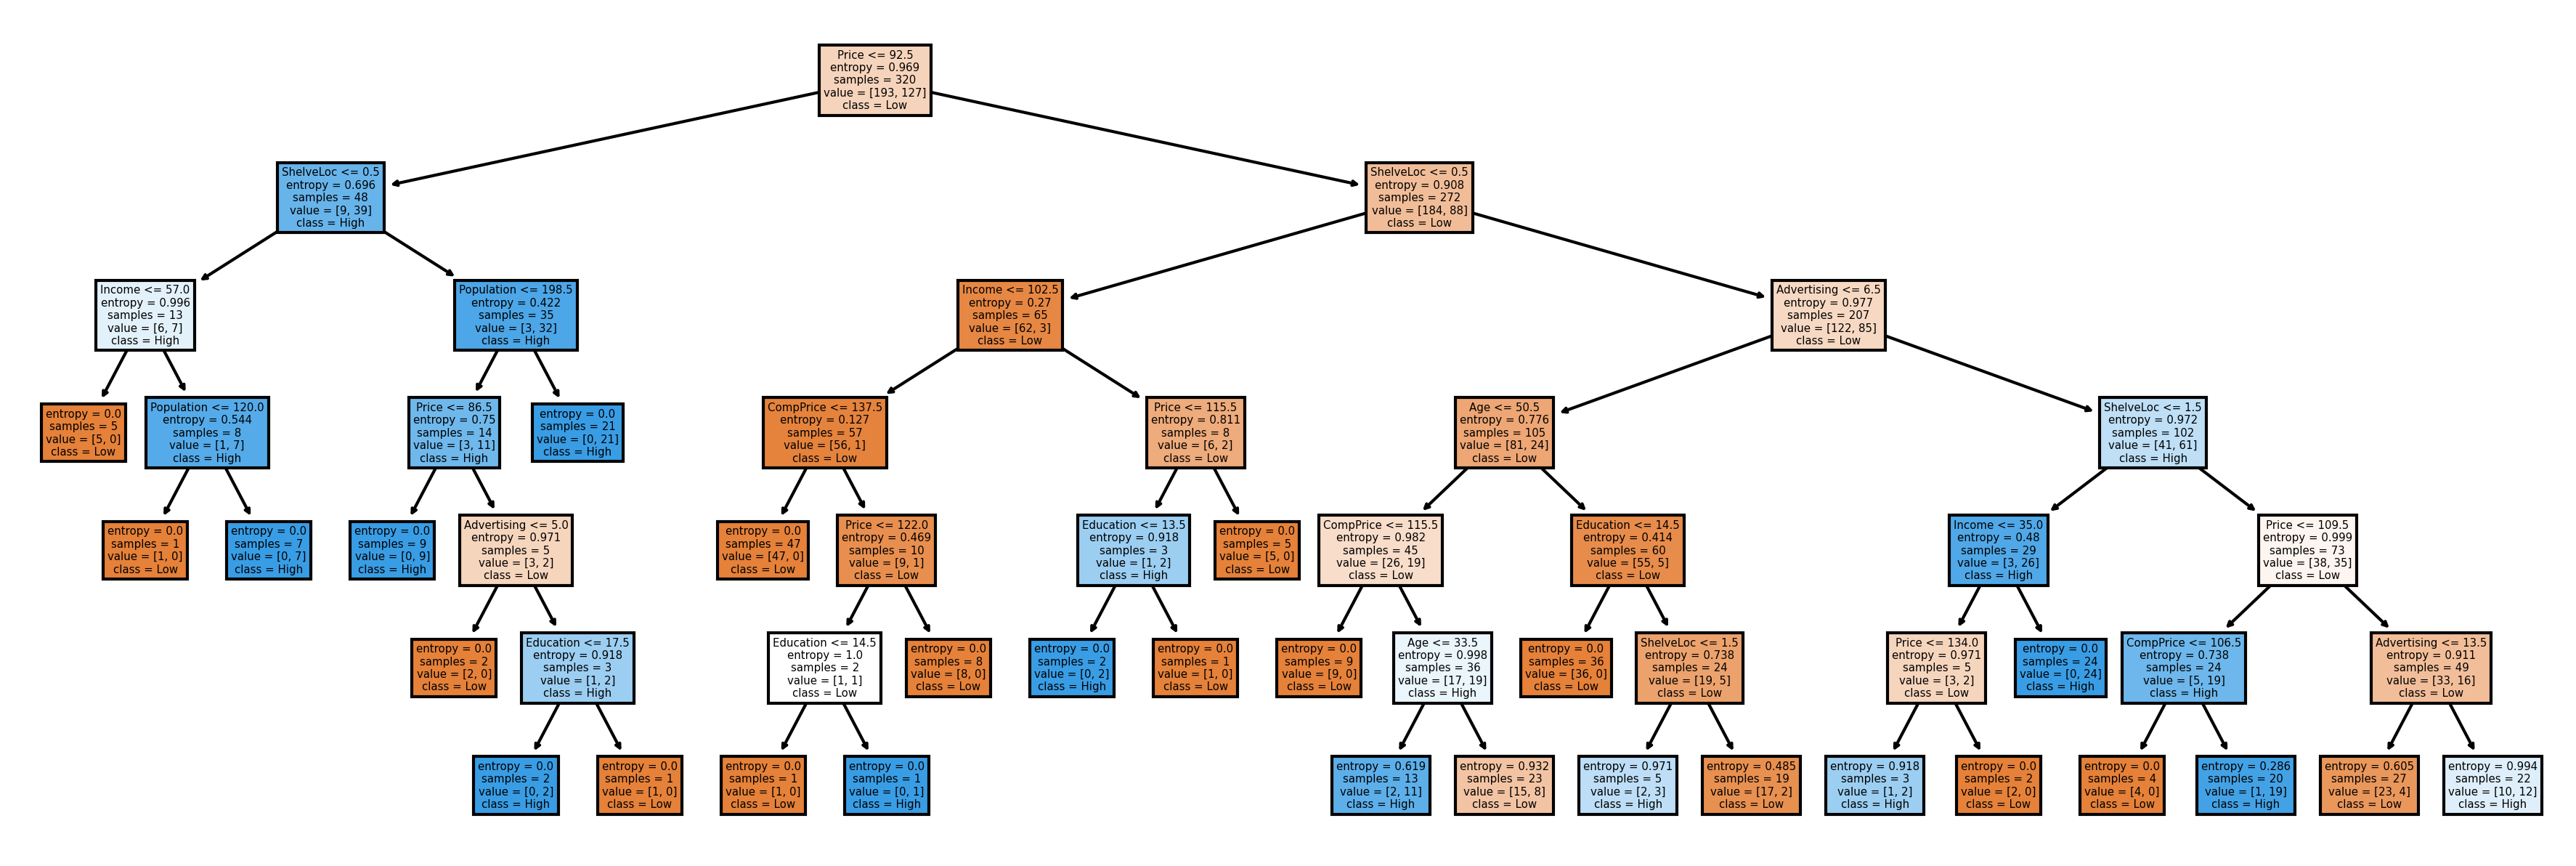

In [154]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 
plt.show()

In [155]:
model.feature_importances_

array([0.10395906, 0.09753086, 0.13722562, 0.03922779, 0.24729807,
       0.22266481, 0.08559392, 0.06649988, 0.        , 0.        ])

In [156]:
# all importances features in ascending order
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Price          0.247298
ShelveLoc      0.222665
Advertising    0.137226
CompPrice      0.103959
Income         0.097531
Age            0.085594
Education      0.066500
Population     0.039228
US             0.000000
Urban          0.000000
dtype: float64

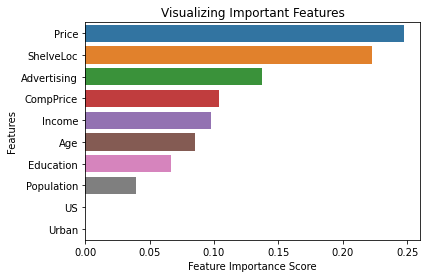

In [157]:
get_ipython().run_line_magic('matplotlib', 'inline')
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [158]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    54
1    26
dtype: int64

In [159]:
preds

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [160]:
pd.crosstab(y_test,preds)  

col_0,0,1
High,,
0,37,6
1,17,20


In [161]:
# Accuracy
np.mean(preds==y_test)

0.7125

#### Accuracy of the Decesion tree Model for Company dataset  using Entropy is 71.25%.

# Building Decision Tree Classifier (CART) using Gini Criteria

In [166]:
#  Descision tree classifier using gini criteria

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6) 

In [167]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=6)

In [168]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test) 

0.7125

####  Accuracy of the Decesion tree Model for Company dataset  using gini is 71.25%.